# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

## 1. Data Exploration and Preprocessing:

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [65]:
#load dataset
adult=pd.read_csv(r"C:\Users\karen\Downloads\adult_with_headers.csv")
adult.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
10116,51,Private,161691,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
5209,25,?,262245,Assoc-voc,11,Never-married,?,Own-child,White,Female,3418,0,40,United-States,<=50K
19207,46,State-gov,298786,Some-college,10,Never-married,Other-service,Own-child,Black,Female,0,0,40,United-States,<=50K
9246,39,Private,317434,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15775,52,Self-emp-not-inc,194995,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,55,United-States,>50K
3532,34,Private,127651,10th,6,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,44,?,<=50K
14194,34,Private,160261,HS-grad,9,Never-married,Tech-support,Own-child,Asian-Pac-Islander,Male,14084,0,35,China,>50K
31458,24,Private,314182,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Female,0,0,50,United-States,<=50K
7375,39,Local-gov,116666,HS-grad,9,Never-married,Protective-serv,Own-child,Amer-Indian-Eskimo,Male,4650,0,48,United-States,<=50K
19759,34,Local-gov,22641,HS-grad,9,Never-married,Protective-serv,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K


In [66]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [67]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [68]:
adult.duplicated().sum()

24

In [69]:
adult[adult.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [70]:
adult=adult.drop_duplicates()
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


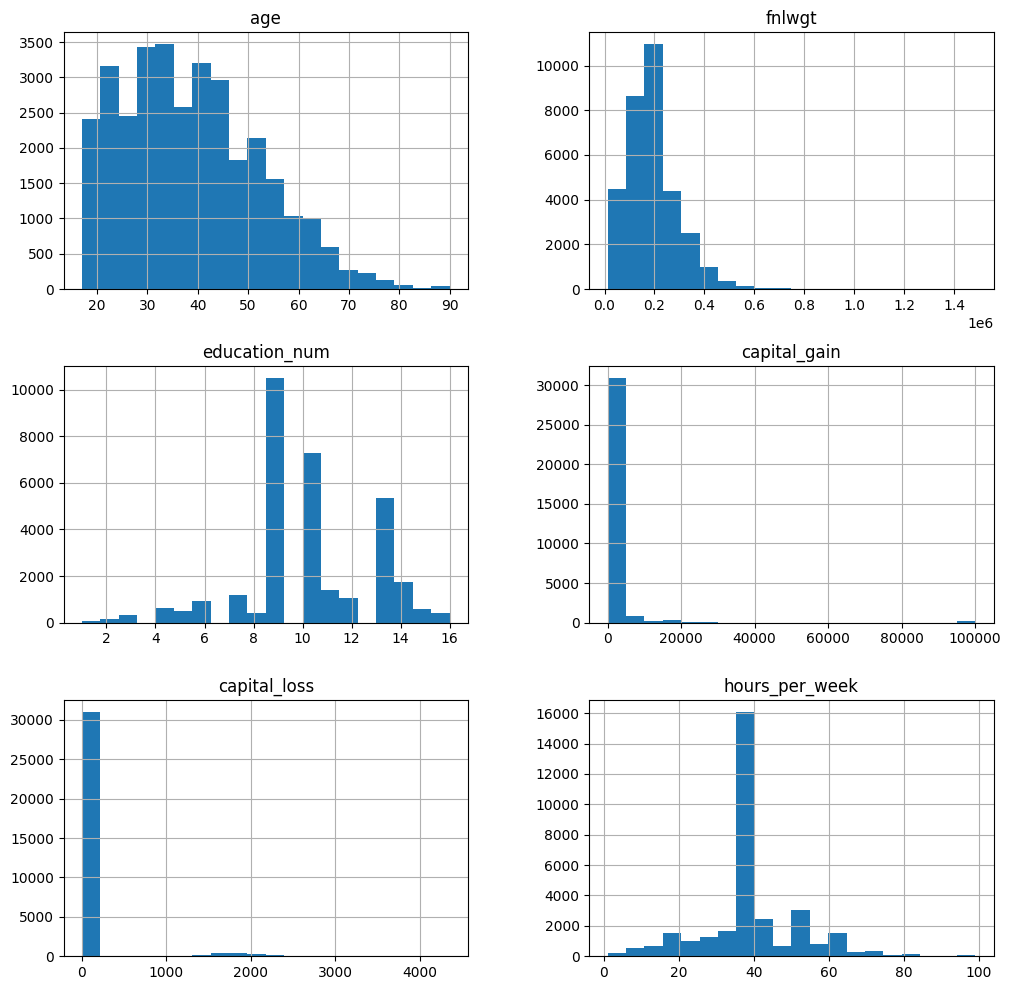

In [72]:
adult.hist(bins=20,figsize=(12,12))
plt.show()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


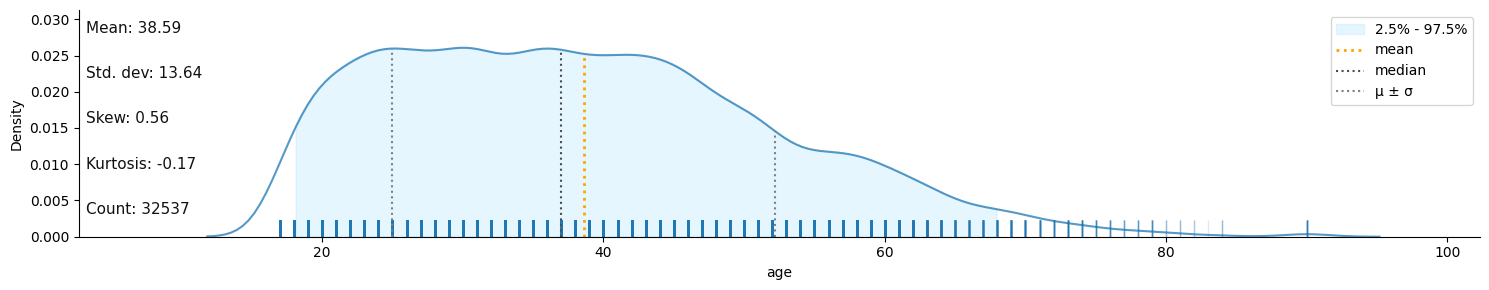

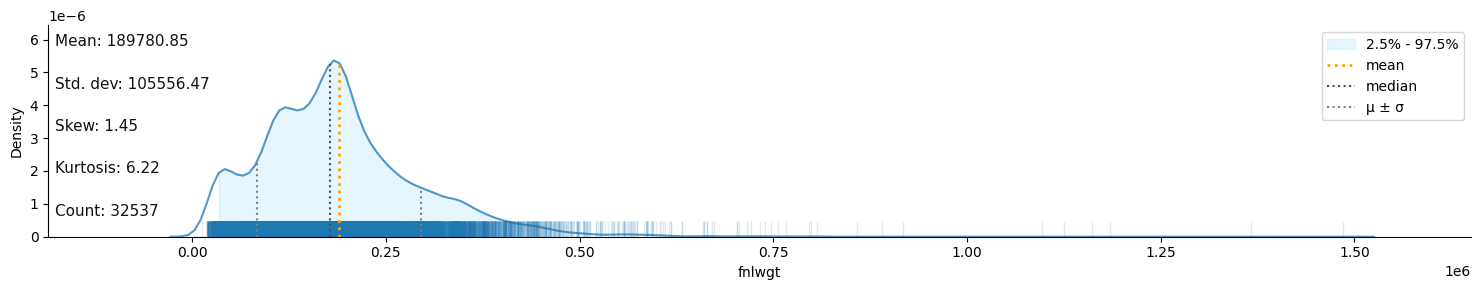

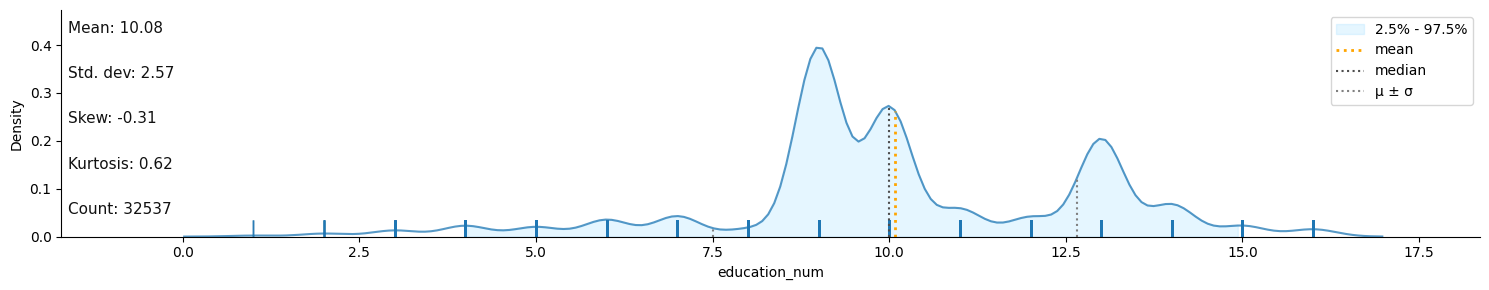

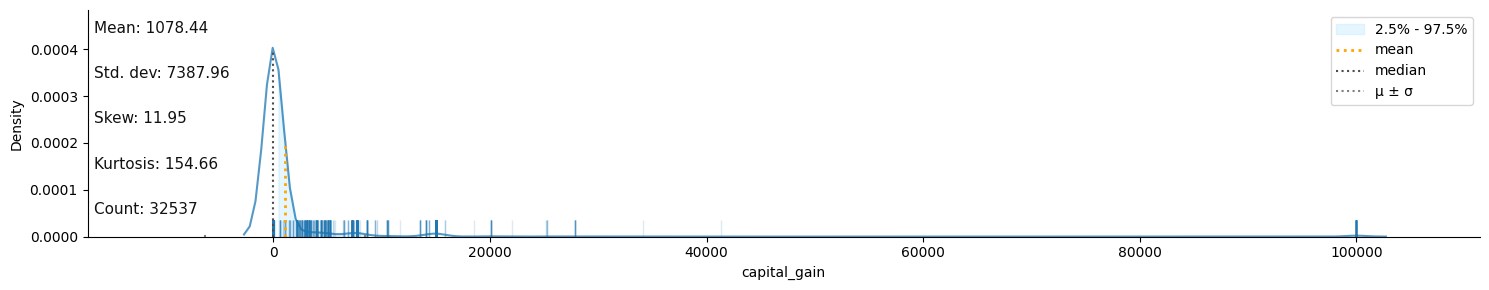

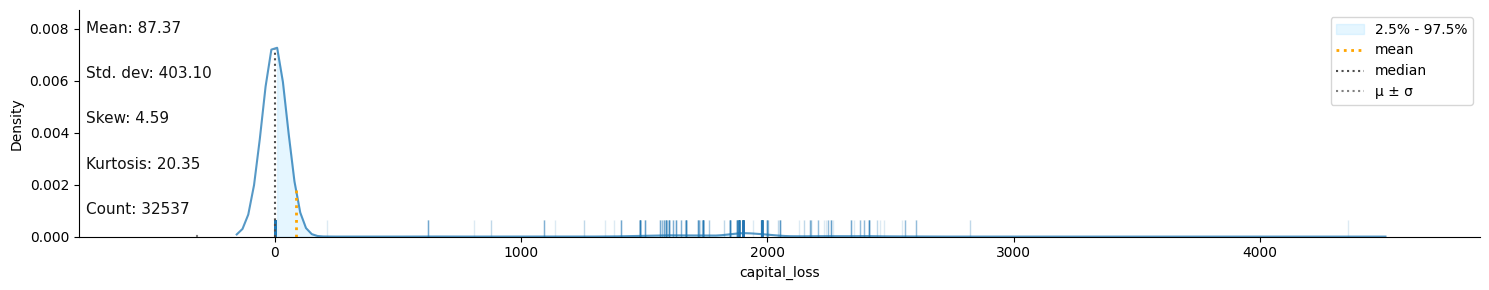

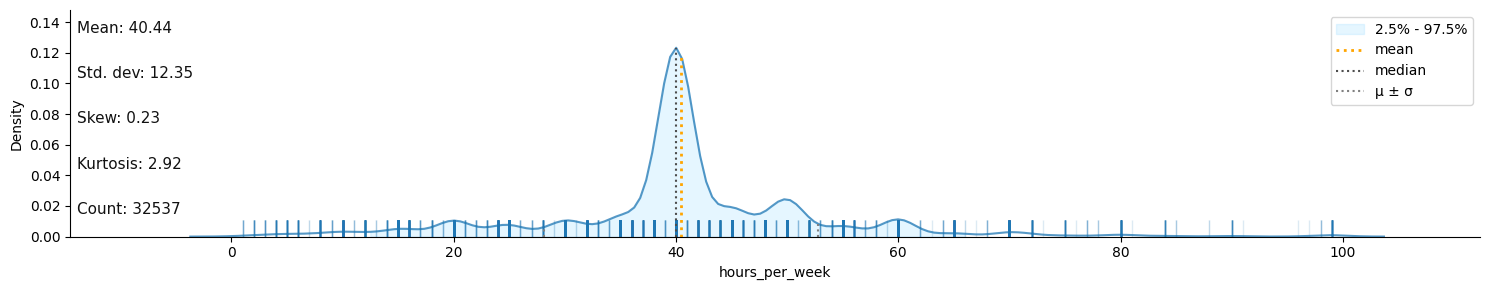

In [73]:
import klib
for i in adult.describe().columns:
    klib.dist_plot(adult[i])
plt.show()


GridSpec(6, 9)

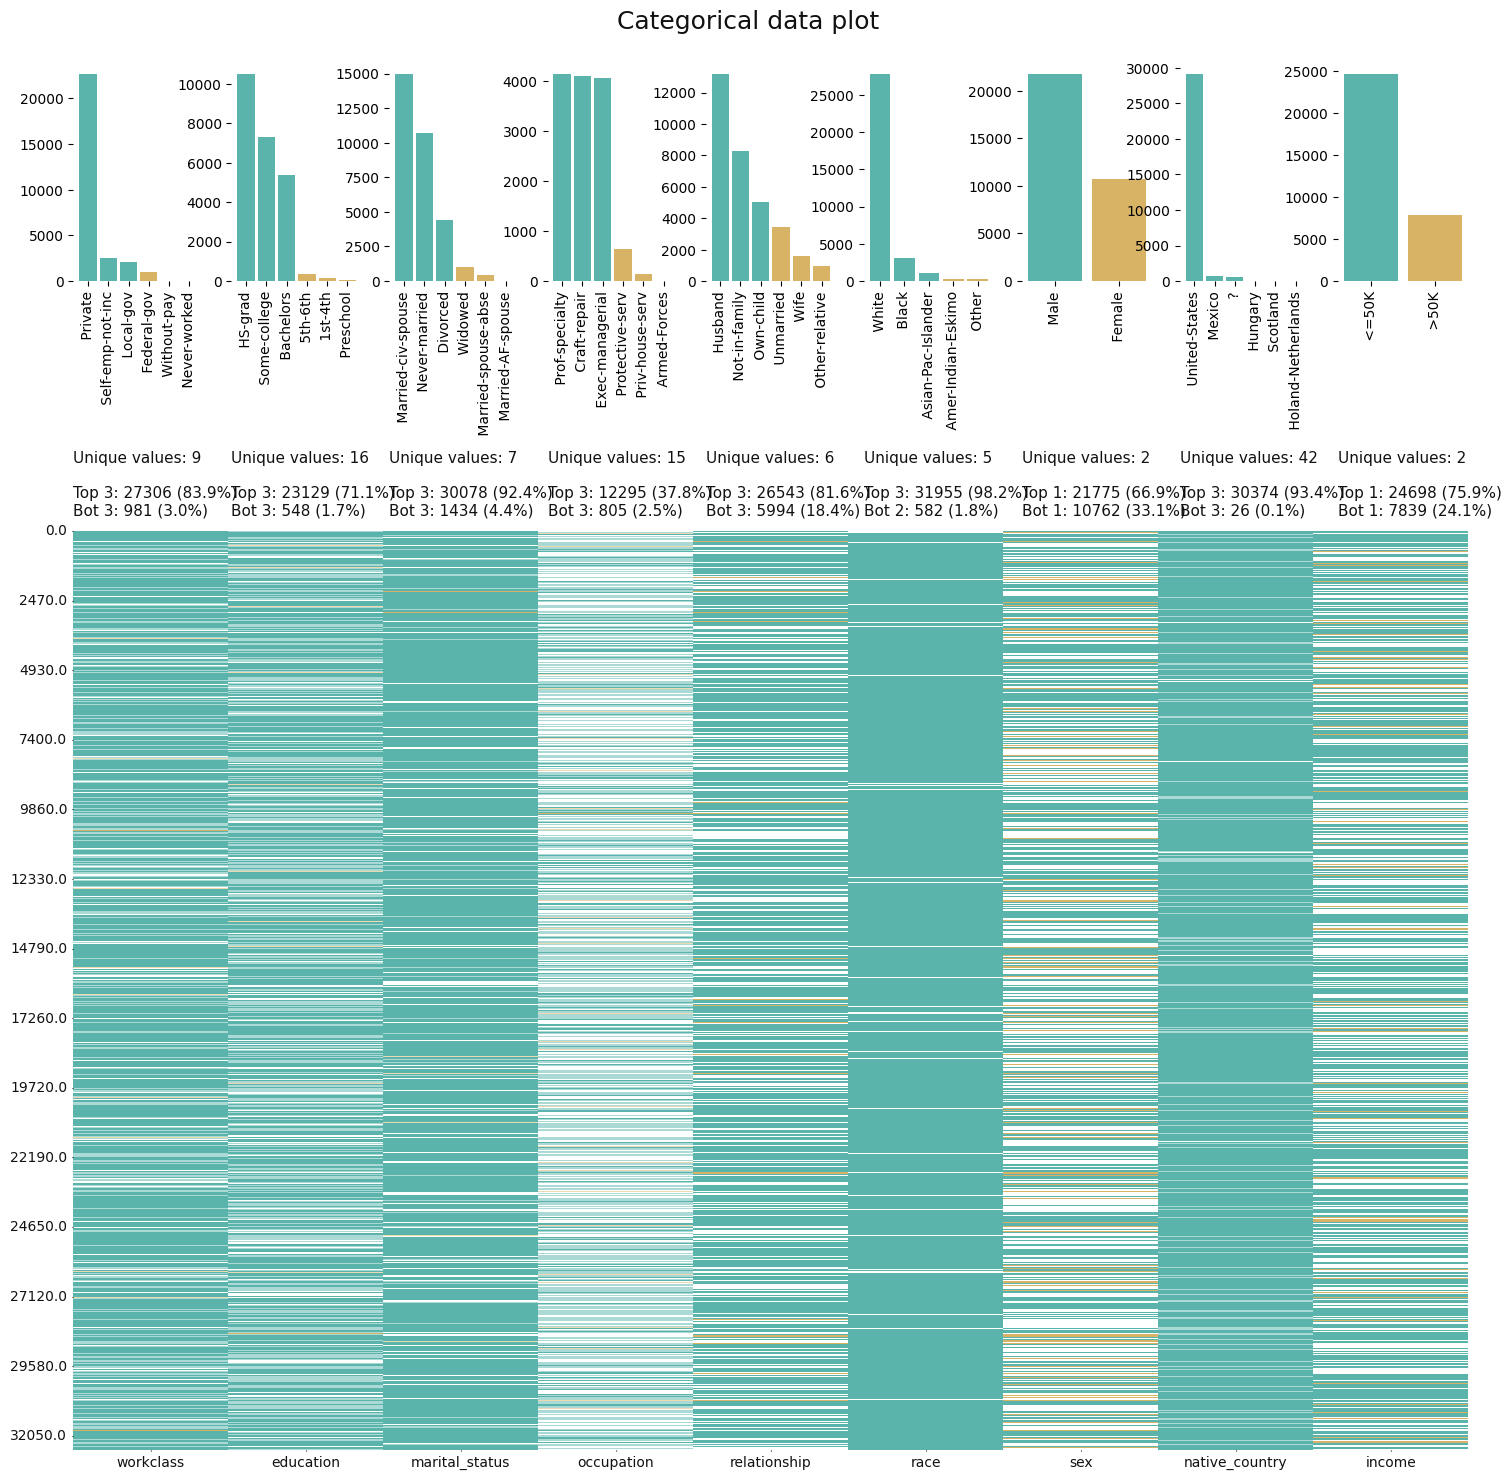

In [74]:
klib.cat_plot(adult)

In [75]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [76]:
#scaling
num_col=adult.select_dtypes(include=[int,float]).columns

In [77]:
num_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [78]:
stdscaler=StandardScaler()
minmaxscaler=MinMaxScaler()

In [79]:
dfstd=stdscaler.fit_transform(adult[num_col])
dfstd=pd.DataFrame(dfstd,columns=num_col)
dfmm=minmaxscaler.fit_transform(adult[num_col])
dfmm=pd.DataFrame(dfmm,columns=num_col)

In [80]:
dfstd

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


In [81]:
dfmm

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [82]:
dfstd.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04,3.253700e+04
mean,-7.555945e-17,-1.255685e-16,2.849858e-17,3.646945e-17,4.367598e-19,-6.485884e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582777e+00,-1.681551e+00,-3.531590e+00,-1.459754e-01,-2.167432e-01,-3.194403e+00
25%,-7.761933e-01,-6.816726e-01,-4.206787e-01,-1.459754e-01,-2.167432e-01,-3.566374e-02
50%,-1.162616e-01,-1.082361e-01,-3.181473e-02,-1.459754e-01,-2.167432e-01,-3.566374e-02
75%,6.903217e-01,4.472760e-01,7.459132e-01,-1.459754e-01,-2.167432e-01,3.693028e-01
max,3.770003e+00,1.226778e+01,2.301369e+00,1.338964e+01,1.058963e+01,4.742941e+00


In [83]:
dfmm.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,0.295692,0.120547,0.605454,0.010785,0.020057,0.402452
std,0.186822,0.071689,0.171442,0.073880,0.092539,0.125989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152611,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Discuss the scenarios where each scaling technique is preferred and why.
#### Standardization:
    Preferred when data is normally distributed or when the algorithm assumes a Gaussian distribution.
#### Normalization (Min-Max Scaling):
    Preferred when data needs to be bounded within a specific range (e.g., [0, 1] or [-1, 1]).

# 2. Encoding Techniques:

In [84]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [85]:
le=LabelEncoder()
oe=OneHotEncoder()

In [86]:
list1=[]
for i in adult.select_dtypes(include='object').columns:
    if adult[i].nunique()>5:
        adult[i]=le.fit_transform(adult[i])
    else:
        list1.append(i)
adult.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K


In [87]:
list1

['race', 'sex', 'income']

In [88]:
race=pd.get_dummies(adult['race'],drop_first=True)
race.head()

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [89]:
sex=pd.get_dummies(adult['sex'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,1
3,1
4,0


In [90]:
income=pd.get_dummies(adult['income'],drop_first=True)
income.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [91]:
adult = pd.concat([adult, race, sex, income], axis=1)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,income,Asian-Pac-Islander,Black,Other,White,Male,>50K
0,39,7,77516,9,13,4,1,1,White,Male,...,0,40,39,<=50K,0,0,0,1,1,0
1,50,6,83311,9,13,2,4,0,White,Male,...,0,13,39,<=50K,0,0,0,1,1,0
2,38,4,215646,11,9,0,6,1,White,Male,...,0,40,39,<=50K,0,0,0,1,1,0
3,53,4,234721,1,7,2,6,0,Black,Male,...,0,40,39,<=50K,0,1,0,0,1,0
4,28,4,338409,9,13,2,10,5,Black,Female,...,0,40,5,<=50K,0,1,0,0,0,0


In [92]:
adult = adult.drop(['race', 'sex', 'income'], axis=1)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,Asian-Pac-Islander,Black,Other,White,Male,>50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,0,0,0,1,1,0
1,50,6,83311,9,13,2,4,0,0,0,13,39,0,0,0,1,1,0
2,38,4,215646,11,9,0,6,1,0,0,40,39,0,0,0,1,1,0
3,53,4,234721,1,7,2,6,0,0,0,40,39,0,1,0,0,1,0
4,28,4,338409,9,13,2,10,5,0,0,40,5,0,1,0,0,0,0


**Pros of One-Hot Encoding:**

* Easily interpretable results
* Efficient for sparse data
* Handles non-numeric categorical variables neatly

**Cons of One-Hot Encoding:**

* High dimensionality and memory consumption
* May lead to the curse of dimensionality
* Computationally expensive

**Pros of Label Encoding:**

* Easily handle large datasets
* Less memory consumption
* Quick computation

**Cons of Label Encoding:**

* May lead to confusion if similar categories are close together
* Can be sensitive to the order of categories
* Not suitable for unordered categorical data

# 3. Feature Engineering:

In [93]:
adult['capital-gain-minus-loss'] = adult['capital_gain'] - adult['capital_loss']
adult['age_squared'] = adult['age'] ** 2

In [94]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,Asian-Pac-Islander,Black,Other,White,Male,>50K,capital-gain-minus-loss,age_squared
0,39,7,77516,9,13,4,1,1,2174,0,40,39,0,0,0,1,1,0,2174,1521
1,50,6,83311,9,13,2,4,0,0,0,13,39,0,0,0,1,1,0,0,2500
2,38,4,215646,11,9,0,6,1,0,0,40,39,0,0,0,1,1,0,0,1444
3,53,4,234721,1,7,2,6,0,0,0,40,39,0,1,0,0,1,0,0,2809
4,28,4,338409,9,13,2,10,5,0,0,40,5,0,1,0,0,0,0,0,784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,38,39,0,0,0,1,0,0,0,729
32557,40,4,154374,11,9,2,7,0,0,0,40,39,0,0,0,1,1,1,0,1600
32558,58,4,151910,11,9,6,1,4,0,0,40,39,0,0,0,1,0,0,0,3364
32559,22,4,201490,11,9,4,1,3,0,0,20,39,0,0,0,1,1,0,0,484


In [95]:
adult['capital-gain_log']=np.log1p(adult['capital_gain'])
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,Asian-Pac-Islander,Black,Other,White,Male,>50K,capital-gain-minus-loss,age_squared,capital-gain_log
0,39,7,77516,9,13,4,1,1,2174,0,...,39,0,0,0,1,1,0,2174,1521,7.684784
1,50,6,83311,9,13,2,4,0,0,0,...,39,0,0,0,1,1,0,0,2500,0.000000
2,38,4,215646,11,9,0,6,1,0,0,...,39,0,0,0,1,1,0,0,1444,0.000000
3,53,4,234721,1,7,2,6,0,0,0,...,39,0,1,0,0,1,0,0,2809,0.000000
4,28,4,338409,9,13,2,10,5,0,0,...,5,0,1,0,0,0,0,0,784,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,39,0,0,0,1,0,0,0,729,0.000000
32557,40,4,154374,11,9,2,7,0,0,0,...,39,0,0,0,1,1,1,0,1600,0.000000
32558,58,4,151910,11,9,6,1,4,0,0,...,39,0,0,0,1,0,0,0,3364,0.000000
32559,22,4,201490,11,9,4,1,3,0,0,...,39,0,0,0,1,1,0,0,484,0.000000


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


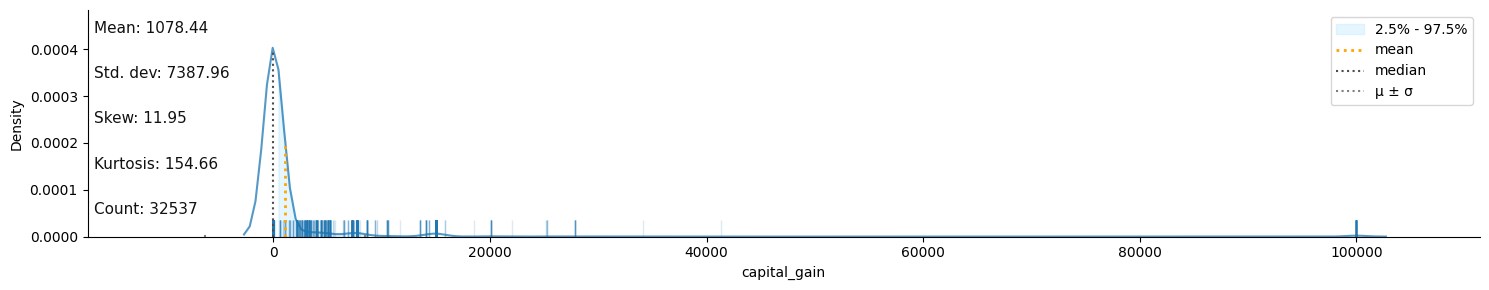

In [96]:
klib.dist_plot(adult['capital_gain'])
plt.show()

# **Why Log Transformation for "Capital Gain"?**

* The "capital_gain" feature, being highly skewed, likely has many small values and a few very large values. Applying a log transformation can help reduce this skew, making the distribution more normal-like (Gaussian), which many models prefer.

# 4. Feature Selection:

In [97]:
from sklearn.ensemble import IsolationForest

In [98]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(adult)
yhat

array([ 1,  1,  1, ...,  1,  1, -1])

In [99]:
mask = yhat != -1
adult = adult[mask]
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,Asian-Pac-Islander,Black,Other,White,Male,>50K,capital-gain-minus-loss,age_squared,capital-gain_log
0,39,7,77516,9,13,4,1,1,2174,0,...,39,0,0,0,1,1,0,2174,1521,7.684784
1,50,6,83311,9,13,2,4,0,0,0,...,39,0,0,0,1,1,0,0,2500,0.000000
2,38,4,215646,11,9,0,6,1,0,0,...,39,0,0,0,1,1,0,0,1444,0.000000
3,53,4,234721,1,7,2,6,0,0,0,...,39,0,1,0,0,1,0,0,2809,0.000000
5,37,4,284582,12,14,2,4,5,0,0,...,39,0,0,0,1,0,0,0,1369,0.000000


* Outliers can distort model performance, leading to overfitting, increased variance, and poor generalization.

* Removing outliers can result in a more robust and accurate model, as it allows the model to focus on the general pattern of the data without being misled by extreme values.

In [100]:
import ppscore as pps
pp_score = pps.matrix(adult)
pp_score

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.6652,0.782558,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,76340.8862,77576.630965,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.5828,2.636201,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.7840,1.827438,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
436,capital-gain_log,Male,0.000000,regression,True,mean absolute error,0.3200,0.428302,DecisionTreeRegressor()
437,capital-gain_log,>50K,0.000000,regression,True,mean absolute error,0.2108,0.297495,DecisionTreeRegressor()
438,capital-gain_log,capital-gain-minus-loss,0.656141,regression,True,mean absolute error,390.5492,134.293792,DecisionTreeRegressor()
439,capital-gain_log,age_squared,0.000000,regression,True,mean absolute error,822.2588,850.123791,DecisionTreeRegressor()


In [101]:
pp_corr = pd.pivot_table(pp_score, index='x', columns='y', values='ppscore')
pp_corr

y,>50K,Asian-Pac-Islander,Black,Male,Other,White,age,age_squared,capital-gain-minus-loss,capital-gain_log,...,capital_loss,education,education_num,fnlwgt,hours_per_week,marital_status,native_country,occupation,relationship,workclass
x,,,,,,,,,,,,,,,,,,,,,
>50K,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.031280,0.000000,0.000000,0.000000,...,0.000000,0.0,0.021933,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Asian-Pac-Islander,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Black,0.0,0.0,1.000000,0.000000,0.0,0.379466,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
Male,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.112675,0.000000
Other,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
White,0.0,0.0,0.357175,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000573,0.000000,0.000000
age,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.999640,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.157384,0.0,0.000000,0.021085,0.000000
age_squared,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.999830,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.157384,0.0,0.000000,0.021085,0.000000
capital-gain-minus-loss,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.997319,...,0.996426,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


<Axes: xlabel='y', ylabel='x'>

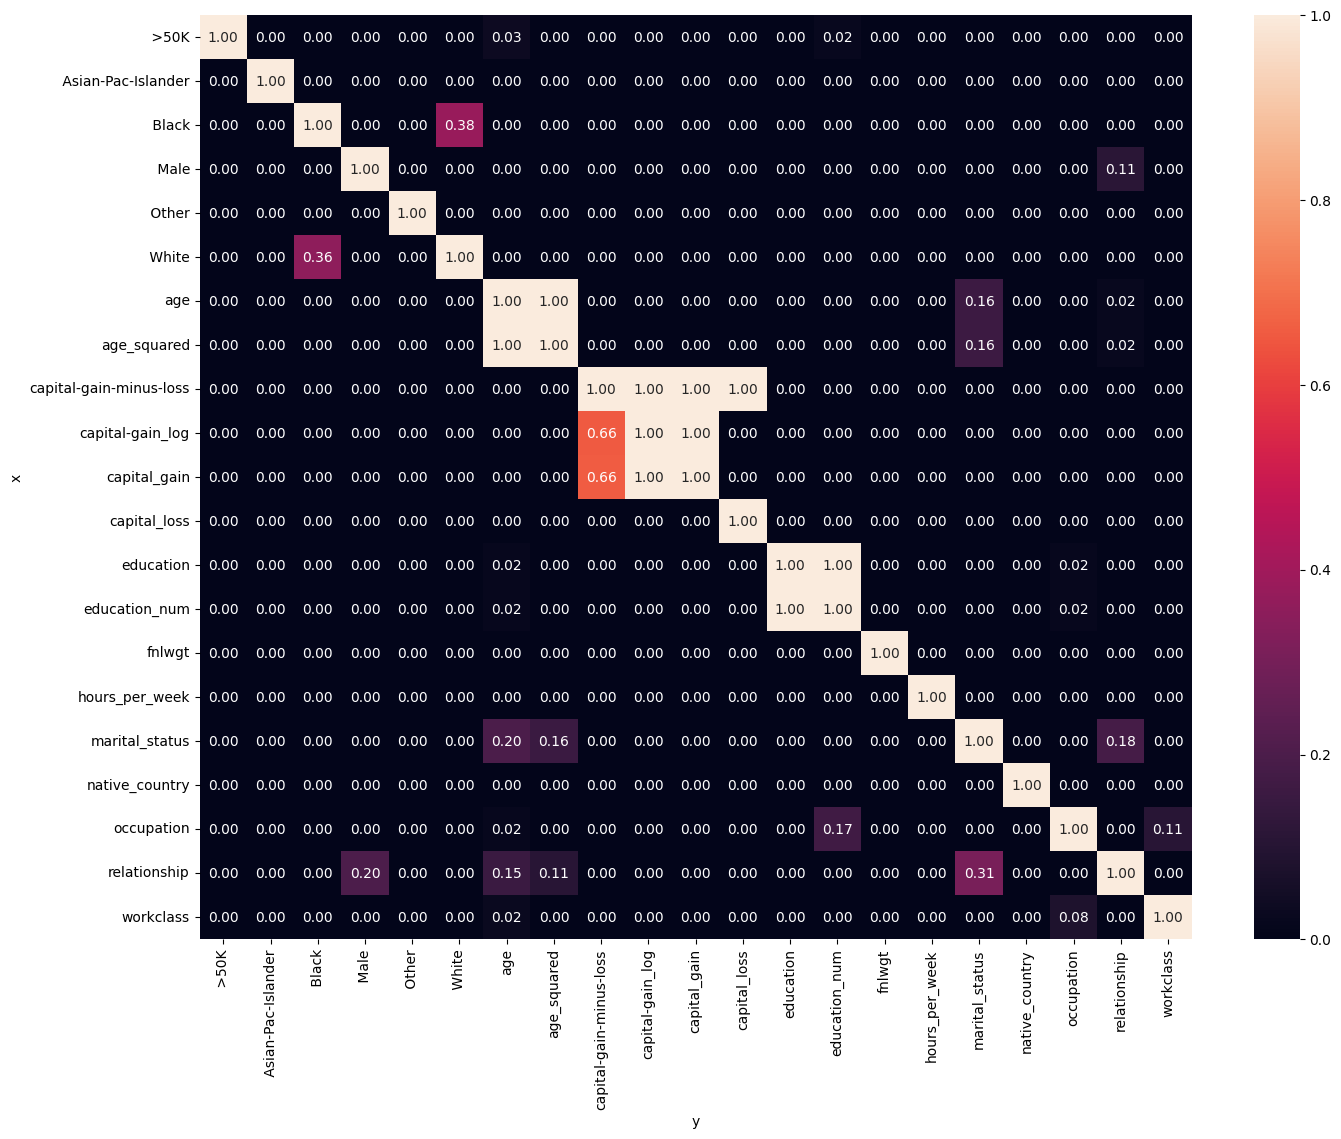

In [102]:
plt.figure(figsize=(16,12))
sns.heatmap(pp_corr,annot=True,fmt=".2f")

In [103]:
corr = adult.corr()
corr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,Asian-Pac-Islander,Black,Other,White,Male,>50K,capital-gain-minus-loss,age_squared,capital-gain_log
age,1.000000,0.039272,-0.076425,0.010014,0.056465,-0.318610,-0.005257,-0.295415,0.075357,0.033964,...,0.016960,-0.035715,-0.056467,-0.025829,0.072620,0.111966,0.237902,0.065352,0.982710,0.069555
workclass,0.039272,1.000000,-0.019230,0.009512,0.028934,-0.057688,0.210605,-0.089509,0.017243,0.021402,...,-0.006688,0.011283,-0.012733,0.005650,0.009996,0.084533,0.038131,0.011943,0.021691,0.016056
fnlwgt,-0.076425,-0.019230,1.000000,-0.028372,-0.045143,0.030487,-0.001149,0.008040,-0.009798,-0.008825,...,-0.066019,-0.038616,0.099984,0.008443,-0.053256,0.027135,-0.010601,-0.007523,-0.074875,-0.010726
education,0.010014,0.009512,-0.028372,1.000000,0.327957,-0.024484,-0.028756,0.005073,0.019283,0.025313,...,0.064356,0.016645,0.022557,-0.004758,-0.025023,-0.045611,0.066366,0.013051,-0.002458,0.019800
education_num,0.056465,0.028934,-0.045143,0.327957,1.000000,-0.046836,0.100801,-0.092293,0.095583,0.083614,...,0.072402,0.045411,-0.041069,-0.014566,0.028787,-0.002260,0.312900,0.073938,0.025281,0.069718
marital_status,-0.318610,-0.057688,0.030487,-0.024484,-0.046836,1.000000,-0.003987,0.203366,-0.058434,-0.035692,...,-0.023637,0.032244,0.089032,0.009479,-0.092008,-0.128719,-0.196090,-0.048609,-0.258205,-0.056844
occupation,-0.005257,0.210605,-0.001149,-0.028756,0.100801,-0.003987,1.000000,-0.073848,0.004724,0.022385,...,-0.001343,0.006323,0.012253,0.008609,-0.014161,0.072302,0.068009,-0.000377,-0.013276,0.006878
relationship,-0.295415,-0.089509,0.008040,0.005073,-0.092293,0.203366,-0.073848,1.000000,-0.125608,-0.089006,...,0.018279,-0.000109,0.124087,-0.021412,-0.110252,-0.572662,-0.283456,-0.101775,-0.267692,-0.116060
capital_gain,0.075357,0.017243,-0.009798,0.019283,0.095583,-0.058434,0.004724,-0.125608,1.000000,-0.038746,...,0.037792,-0.024400,-0.054379,-0.011628,0.062204,0.099385,0.243346,0.975337,0.060672,0.875690
capital_loss,0.033964,0.021402,-0.008825,0.025313,0.083614,-0.035692,0.022385,-0.089006,-0.038746,1.000000,...,0.033781,-0.023721,-0.051894,-0.011304,0.061320,0.065919,0.138832,-0.258346,0.022228,-0.046069


<Axes: >

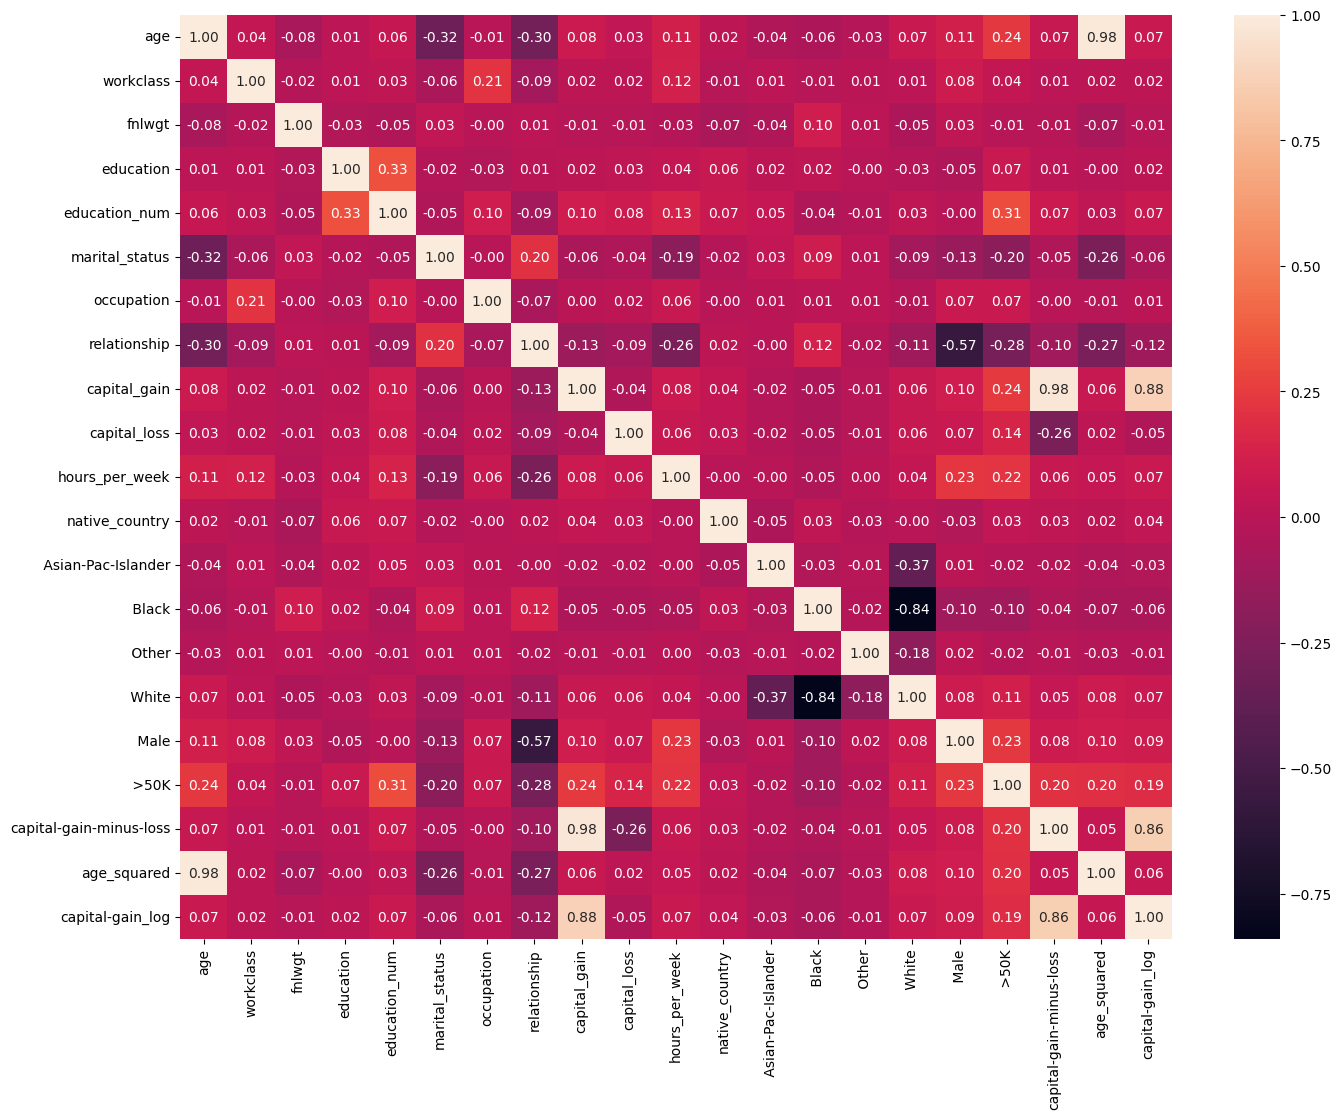

In [104]:
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,fmt=".2f")

### **Comparison and Discussion**

- **Predictive Power vs. Correlation**:
  - Both matrices indicate that features like `education_num` and `age` are influential in predicting higher income (`>50K`). However, the PPS matrix provides insights into the predictive power of these features more directly.
  - Features like `workclass` and `native_country` have low predictive power in the PPS matrix, and this is consistent with their low or negligible correlations in the correlation matrix.

- **Features with High Correlation but Low Predictive Power**:
  - `age` and `work_experience` have a high correlation (0.983121), but `work_experience` has only a moderate predictive power score (0.173629). This suggests that while `age` and `work_experience` are related, the latter's contribution to predicting income above $50K is less significant.

- **Feature Relationships**:
  - The correlation matrix shows how features like `education_num` and `education` are perfectly correlated, which makes sense as higher education generally translates to higher education numbers.
  - Negative correlations such as `marital_status` and `relationship` with `>50K` in the correlation matrix indicate that the impact of these features on income might be complex and dependent on other interacting features.